## Script to plot results of heterochromatin localization study

In [77]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# specify directory to analyze
myDir=r'S:\ActiveUsers\Kasia\2019_Liu_forMacro\20190426\20190506-MSL\test\results'

Read all the data - original csv files contain measurements for each frame.

In [96]:
myFiles = [f for f in listdir(myDir) if ('nucleusSignal' in f)]

myData=pd.DataFrame()

for f in myFiles:
    
    myData_temp=pd.read_csv(join(myDir, f))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='nucleus'
    
    try:
        myData = pd.concat([myData,myData_temp],sort=False)
    except:
        myData = myData_temp.copy()
    
    # add euchromatin
    myData_temp=pd.read_csv(join(myDir, f.replace("nucleus", "euChrom")))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='eu'
    
    myData = pd.concat([myData,myData_temp],sort=False)
    
    # add heterochromatin
    myData_temp=pd.read_csv(join(myDir, f.replace("nucleus", "hetChrom")))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='het'
    
    myData = pd.concat([myData,myData_temp],sort=False)
    

Summarize data for each cell and then calculate ratios.

In [220]:
myData_cells=myData.groupby(['file','localization'], as_index=False).sum()

In [221]:
myData_cells

,file,localization,Area,Mean,StdDev,Mode,Slice,total
0,10_E2_nucleusSignal.csv,eu,554669,5041.628,2508.704,4108.760,675,1.018386e+08
1,10_E2_nucleusSignal.csv,het,9928,4682.191,1594.459,3828.503,506,2.090623e+06
2,10_E2_nucleusSignal.csv,nucleus,564597,5046.916,2499.078,4113.269,675,1.039293e+08
3,10_L2.czi_nucleusSignal.csv,eu,578939,9434.489,4213.795,7814.651,540,2.143512e+08
4,10_L2.czi_nucleusSignal.csv,het,16605,11954.682,3764.828,10389.540,533,8.000027e+06
5,10_L2.czi_nucleusSignal.csv,nucleus,595544,9499.617,4225.800,7920.510,540,2.223512e+08


In [218]:
def group_norm(group):
    # find norm factors/group
    area_norm_factor=np.array(group.loc[group.localization=='nucleus','Area'])[0]
    signal_norm_factor=np.array(group.loc[group.localization=='nucleus','total'])[0]
    #modify dataframe
    group['volume_norm']=group.Area/area_norm_factor
    group['signal_norm']=group.total/signal_norm_factor
    return group

In [234]:
myData_cells=myData_cells.groupby(['file'],as_index=False).apply(group_norm)

In [235]:
myData_cells

,file,localization,Area,Mean,StdDev,Mode,Slice,total,volume_norm,signal_norm
0,10_E2_nucleusSignal.csv,eu,554669,5041.628,2508.704,4108.760,675,1.018386e+08,0.982416,0.979884
1,10_E2_nucleusSignal.csv,het,9928,4682.191,1594.459,3828.503,506,2.090623e+06,0.017584,0.020116
2,10_E2_nucleusSignal.csv,nucleus,564597,5046.916,2499.078,4113.269,675,1.039293e+08,1.000000,1.000000
3,10_L2.czi_nucleusSignal.csv,eu,578939,9434.489,4213.795,7814.651,540,2.143512e+08,0.972118,0.964021
4,10_L2.czi_nucleusSignal.csv,het,16605,11954.682,3764.828,10389.540,533,8.000027e+06,0.027882,0.035979
5,10_L2.czi_nucleusSignal.csv,nucleus,595544,9499.617,4225.800,7920.510,540,2.223512e+08,1.000000,1.000000


### Plots

Plot total signal in different structures.

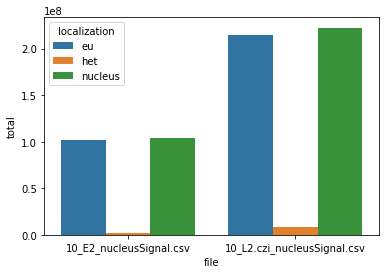

In [223]:
sns.barplot(x="file", y="total", hue="localization", data=myData_cells)

Plot ratios in different chromatin structures.

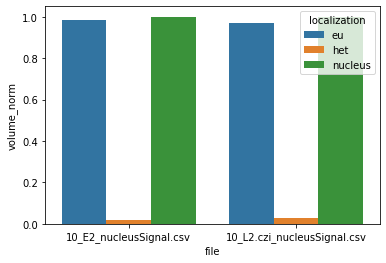

In [236]:
sns.barplot(x="file", y="volume_norm", hue="localization", data=myData_cells)